# Chapter 08 One-Class SVM (Support Vector Machine) for Anomaly Detection

In [1]:
import numpy as np
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(1)

# Generate training data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

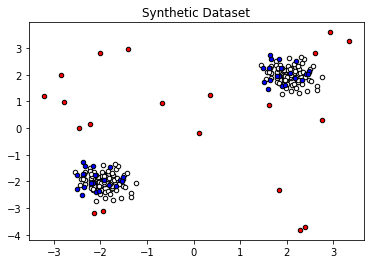

In [2]:
# Plotting the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', s=20, edgecolor='k')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')
plt.title("Synthetic Dataset")
plt.show()

In [3]:
# Fit the model
model = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
model.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.1)

In [4]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_outliers = model.predict(X_outliers)

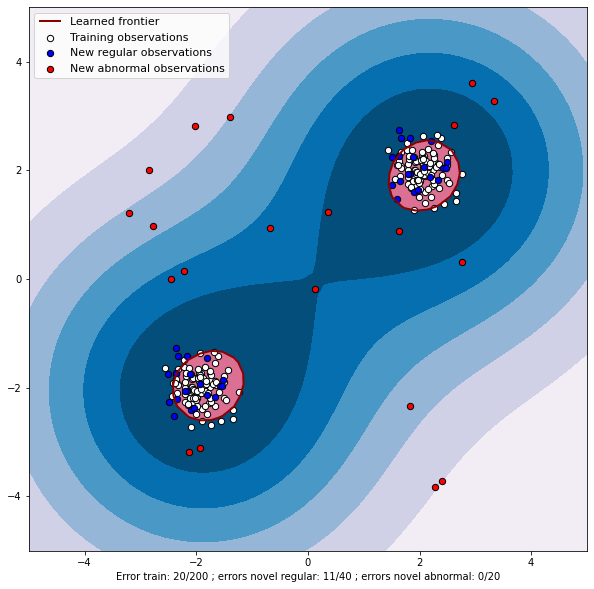

In [7]:
import matplotlib.pyplot as plt
import matplotlib

# Create a meshgrid for the plot
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=s, edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["Learned frontier", "Training observations",
            "New regular observations", "New abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel("Error train: %d/%d ; errors novel regular: %d/%d ; "
           "errors novel abnormal: %d/%d"
           % (y_pred_train[y_pred_train == -1].size, y_pred_train.size,
              y_pred_test[y_pred_test == -1].size, y_pred_test.size,
              y_pred_outliers[y_pred_outliers == 1].size, y_pred_outliers.size))
plt.show()

## creditcard

In [5]:
# Import the necessary libraries
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# Load the dataset
data = pd.read_csv('creditcard.csv')

In [15]:
# Set the fraction of data to sample
fraction = 0.25

# We will use stratified sampling to maintain the ratio of anomalies
stratified_data = data.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=fraction))

# Separate out the features and labels
X_sample = stratified_data.drop('Class', axis=1)
y_sample = stratified_data['Class']

# Standardize the features to have a mean of ~0 and a variance of 1
scaler = StandardScaler()
X_std_sample = scaler.fit_transform(X_sample)

# Apply PCA to reduce dimensions 
pca = PCA(n_components=2)
X_pca_sample = pca.fit_transform(X_std_sample)

# Fit the model only on the normal transactions
model = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.01)
model.fit(X_pca_sample[y_sample == 0])

# Predict the labels for the entire dataset
y_pred_sample = model.predict(X_pca_sample)

# Convert the prediction values to match with 'Class' column in the original dataset
y_pred_sample[y_pred_sample == 1] = 0
y_pred_sample[y_pred_sample == -1] = 1

# Print the confusion matrix
print(confusion_matrix(y_sample, y_pred_sample))

[[63970  7109]
 [   62    61]]


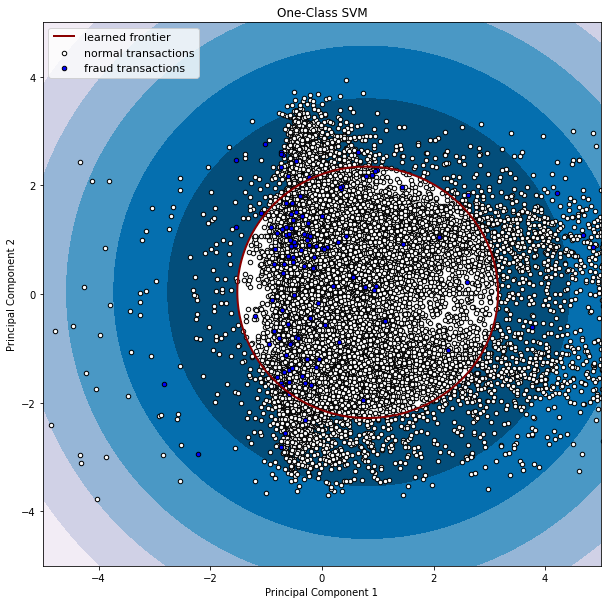

In [14]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Generate a grid for the plot
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# Predict the scores over the grid
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Reshape the scores to the grid
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 10))

# Plot the decision boundary
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

# Plot data points
b1 = plt.scatter(X_pca_sample[y_sample==0, 0], X_pca_sample[y_sample==0, 1], c='white', s=20, edgecolors='k')
b2 = plt.scatter(X_pca_sample[y_sample==1, 0], X_pca_sample[y_sample==1, 1], c='blue', s=20, edgecolors='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.legend([a.collections[0], b1, b2],
           ["learned frontier", "normal transactions", "fraud transactions"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))

plt.title("One-Class SVM")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()